**Assignment-3**

Name : Mudit sand

Roll No. : 203100068

All the answers are in this notebook 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Anser 1) Clustering

Part-a : Data visualization and Preprocessing

In [2]:
# Upload the Given dataset of clustering
from google.colab import files
files.upload()

Saving DataClustering.csv to DataClustering.csv


{'DataClustering.csv': b'x1,x2,x3,x4\r\n0.832354186,1.389428371,0.962226228,0.993670815\r\n1.256087347,1.500486873,0.904117784,0.738034805\r\n0.976953334,1.058524281,1.217530403,1.357238047\r\n1.014364557,1.122683781,1.195846583,0.984144323\r\n1.041385929,1.219013752,0.86481946,1.720824501\r\n1.387625165,0.746951532,0.659932915,0.887681806\r\n1.823523514,0.980651372,1.223184896,0.6673143\r\n0.649789951,0.940367632,1.439826847,0.783551083\r\n0.797686787,1.151004055,0.498678795,0.902644287\r\n0.670004656,1.0170368,1.386834963,0.715656472\r\n1.135195206,1.013088202,0.658192454,1.004549587\r\n0.891900909,0.783116398,1.95891971,0.583858352\r\n1.257438969,1.367046303,0.818986429,1.124417764\r\n0.643447408,1.801145034,1.367110113,1.562858747\r\n1.009729516,0.942325805,0.876154467,0.914347567\r\n1.428841108,0.513018243,0.664050514,0.958389608\r\n0.596633087,0.759351647,0.911530932,0.509385927\r\n0.769919662,0.812396369,0.747076485,0.892193886\r\n1.221484464,1.698065808,1.580054622,0.830251289\

In [3]:
dataclustering = pd.read_csv('/content/DataClustering.csv')
display(dataclustering)

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


In [4]:
#getting the null count in training data
dataclustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


We can see above that All the values are float means continuous and no null value is there.

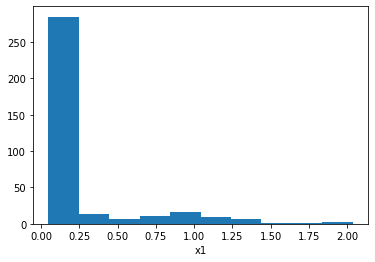

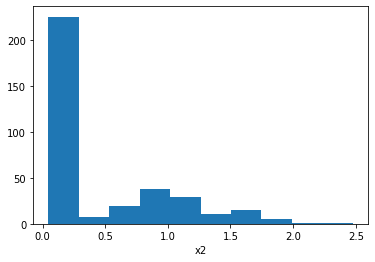

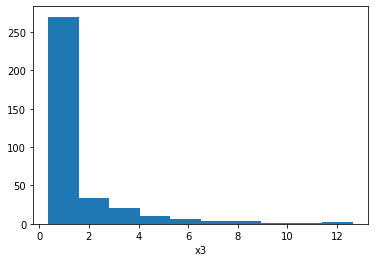

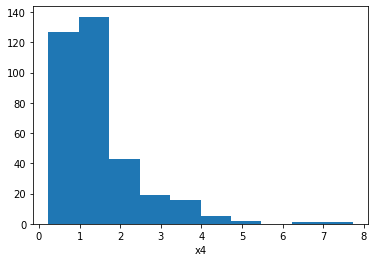

In [5]:
#Plotting the Histogram
for col in dataclustering.columns.values :
  plt.hist(dataclustering[col])
  plt.xlabel(col)
  plt.show()

Data looks skewed which is not ideal for clustering we will confirm it under pairplot also but first looking for correlation.

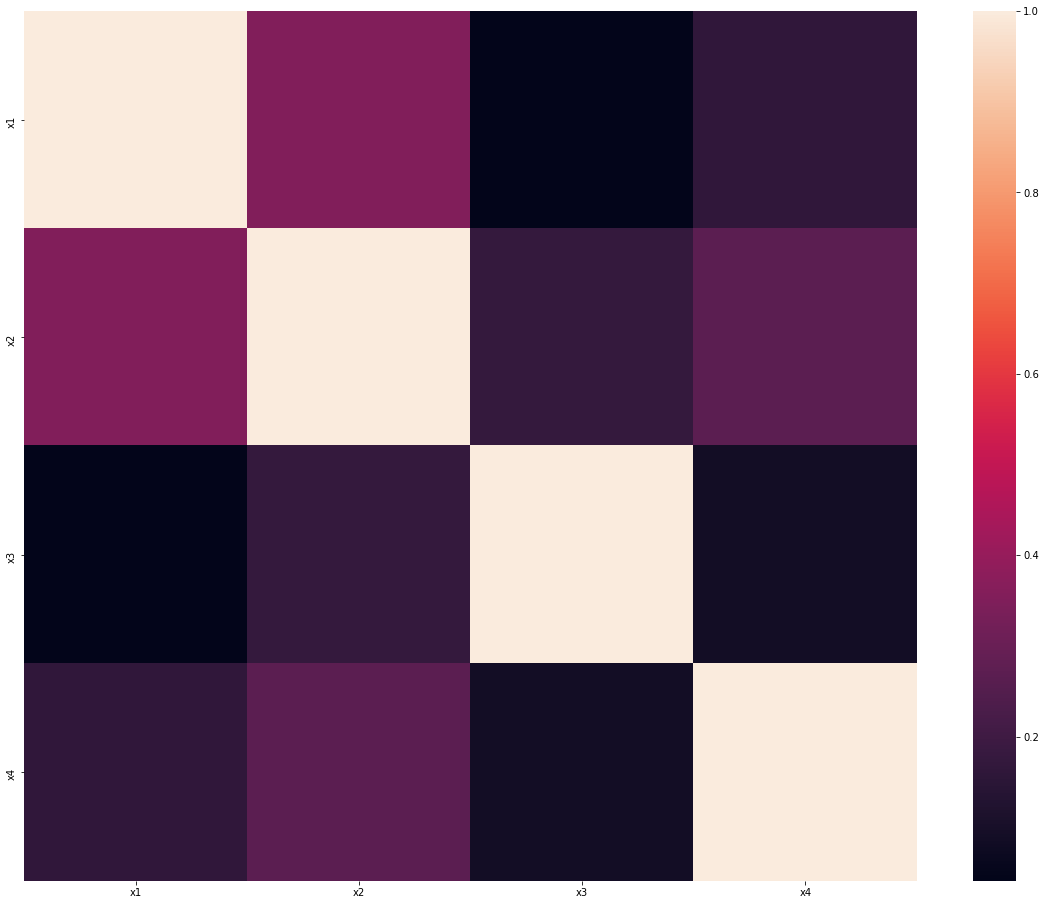

In [6]:
corrMatrix = dataclustering.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

Data columns are not correlated at all

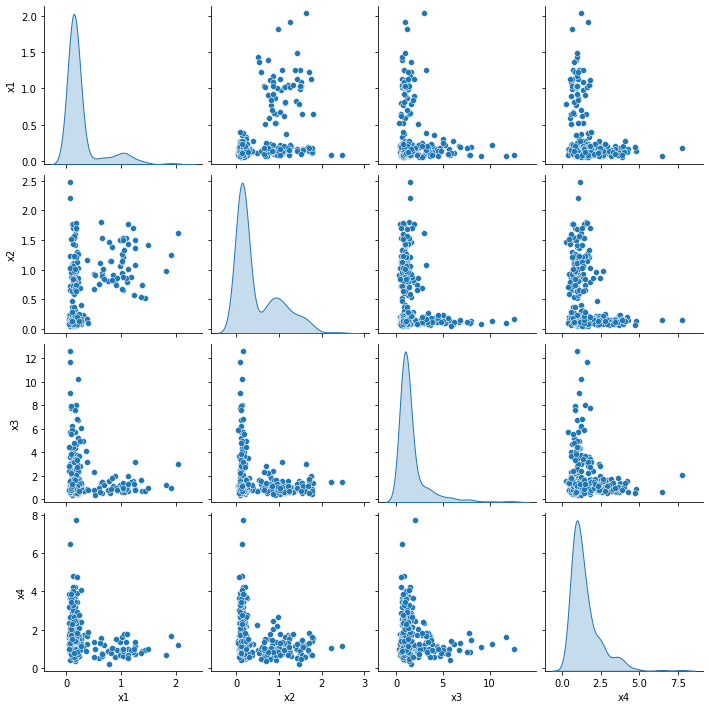

In [7]:
# plotting the pairplot
sns.pairplot(dataclustering, diag_kind='kde')

So we need to remove the Skewness from the data and so we will perform the LOG transformation.

In [8]:
# Performing the log transformatino
data_log = np.log(dataclustering)

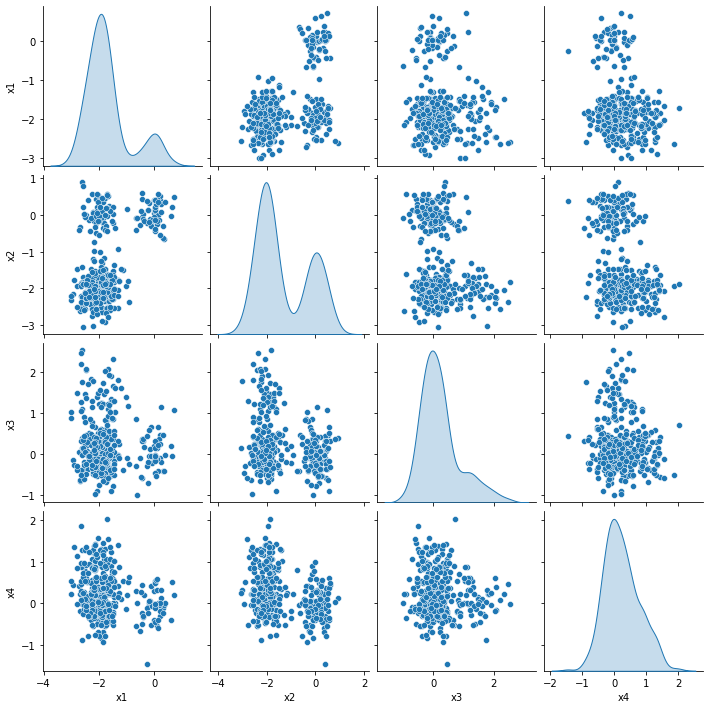

In [9]:
#Visualize again
sns.pairplot(data_log, diag_kind='kde')

Now we can see that skewness is removed.

In [10]:
data_log.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,-1.694414,-1.320507,0.226854,0.233342
std,0.798775,1.055357,0.652094,0.547456
min,-3.024054,-3.057139,-1.000441,-1.458599
25%,-2.195159,-2.160606,-0.204347,-0.153214
50%,-1.874820,-1.797670,0.080223,0.174790
75%,-1.548567,-0.156984,0.443110,0.544914
max,0.711539,0.906692,2.536517,2.044700


We can see that mean is not zero and std is not 1 so we will noramlize the data.

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(data_log)
data_log = scaler.transform(data_log)


Check the mean and std.

In [13]:
print('mean is ', data_log.mean())
print('standard deviation is ' , data_log.std())

mean is  -6.073014835556412e-17
standard deviation is  1.0


Now mean is almost zero and std. is 1

Part- B and Part-C is followed after this.
Part- D : I am doing Part-D first to incorporate TSNE in K-Means and DBSCAN

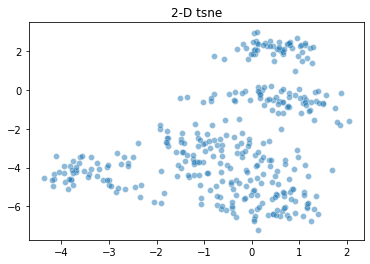

In [14]:
# Code for clustering is taught by Amit Sir in class ML for smart monkeys.
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 150)
tsne_dims = tsne.fit_transform(np.array(data_log))
sns.scatterplot(x=tsne_dims[:,0], y = tsne_dims[:,1], alpha = .5)
plt.title('2-D tsne')
plt.show()

If we look carefully one can form 5-6 clusters and more than that will be overfitting. We will next perform the k-means clustering

Part-B ) K-Means clustering

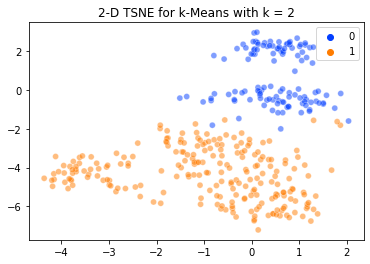

for 2 clusters, score is 0.339188 


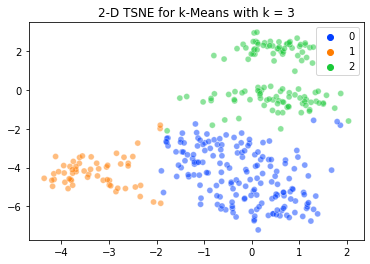

for 3 clusters, score is 0.343497 


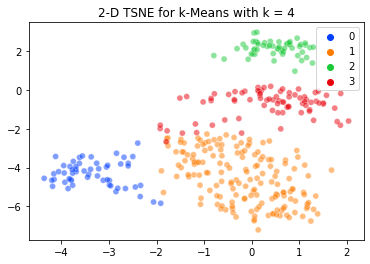

for 4 clusters, score is 0.375719 


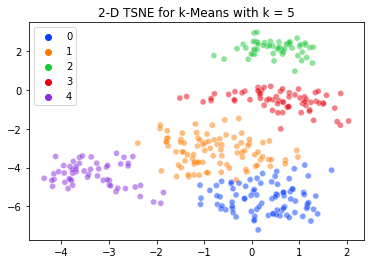

for 5 clusters, score is 0.381614 


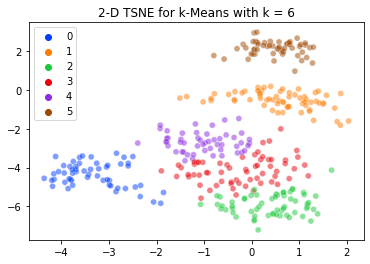

for 6 clusters, score is 0.322239 


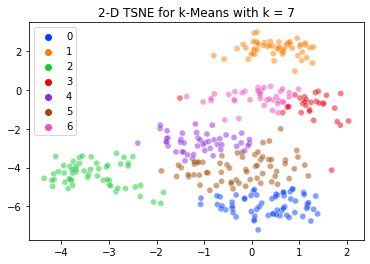

for 7 clusters, score is 0.294745 


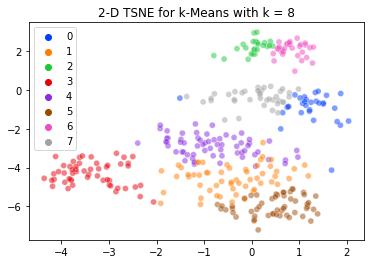

for 8 clusters, score is 0.263141 


In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = np.arange(2,9) # Range of k-values
trials_per_k = 5 # We will randomly initialize multiple times justo to be sure

total_k = k_range.shape[0]
score = np.zeros(total_k)
for k_num in range(0, total_k): # For each k
  kmeans = KMeans(n_clusters = k_range[k_num]) # Initialize clusterer

  trial_score = np.zeros(trials_per_k) #Metric such as Davies Bouldin or silhouette score
  

  for trial in range(0, trials_per_k): # for each trial
    labels = kmeans.fit_predict(data_log)
    trial_score[trial] = metrics.silhouette_score(data_log, labels)

  score[k_num] = np.median(trial_score) 
  sns.scatterplot(x=tsne_dims[:,0], y = tsne_dims[:,1], hue=labels, palette = 'bright', alpha=0.5)
  plt.title('2-D TSNE for k-Means with k = ' + str(k_range[k_num]))
  plt.show()
  print('for %d clusters, score is %f ' % (k_num+2, score[k_num]))

So we can see that silhouette_score is highest for k =5 though it is not above 
0.5 but we can see from the graph it divided the datapoints well.

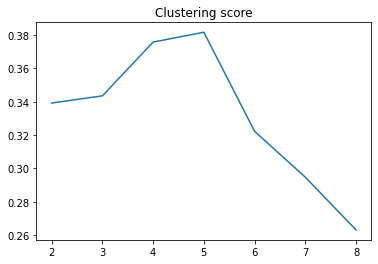

In [18]:
#Plotting the graph for score.

plt.plot(k_range,score)
plt.title('Clustering score')
plt.show()

We can see that peak is at 5

Part-C) DBSCAN

Estimated number of clusters : 5


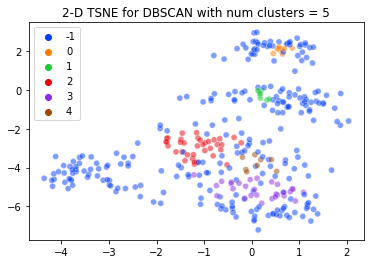

In [49]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = .51, min_samples = 8).fit(data_log)

labels = clustering.labels_
unique_labels = set(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters : %d' % n_clusters_)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
n_noise_ = list(labels).count(-1)

sns.scatterplot(x = tsne_dims[:,0], y = tsne_dims[:,1], hue = labels, palette= 'bright', alpha=.5)

plt.title('2-D TSNE for DBSCAN with num clusters = %d' % n_clusters_)
plt.show()

After Lot of iteration by myself I found that with EPS = .51 and minimum samples = 8 we can get cluster = 5.

**Answer- 2**

PCA

Part - A ) Visualization and Pre processing

In [50]:
# Upload the provided file for PCA 
from google.colab import files
files.upload()

Saving DataPCA.csv to DataPCA.csv


{'DataPCA.csv': b'x1,x2,x3,x4,x5,x6,x7\r\n0.840261404,-1.088159811,4.861744237,4.273054797,4.312457366,-0.137834164,0.076452878\r\n1.320590878,-1.174112669,5.247360274,3.295027366,4.283410226,-0.363759264,-0.170605393\r\n1.537909031,-1.175881624,5.556251194,3.394182763,3.971574492,-0.888398328,0.080616564\r\n0.36355233,-1.130607617,4.329889548,5.5474876,4.539732055,0.342330484,0.2519534\r\n1.56793772,-1.114718857,5.542104302,2.493070875,4.156157483,-0.609694175,-0.291366587\r\n2.053153443,-0.998619639,6.209308562,1.413750352,3.806603728,-1.180406206,-0.342574436\r\n0.857204229,-1.528327336,4.346046838,4.604815649,4.768301133,0.080011451,-0.094111862\r\n0.97432642,-1.299433699,4.609922717,3.957701829,4.847828263,0.551386785,-0.397504325\r\n1.304398902,-1.105422075,5.334994555,3.262553395,4.167344269,-0.520208207,-0.070383962\r\n1.110546884,-1.207944005,5.025713935,3.398416042,4.258595585,-0.560853346,-0.063080748\r\n2.485626229,-1.182087173,6.483631769,1.241431714,3.706422804,-1.5516989

In [51]:
datapca = pd.read_csv('/content/DataPCA.csv')
display(datapca)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


So There are 7 columns

In [52]:
#getting the null count in training data
datapca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


So all the entries are of float datatype and non Null.

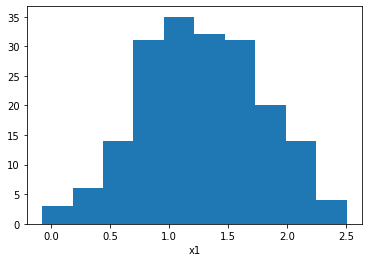

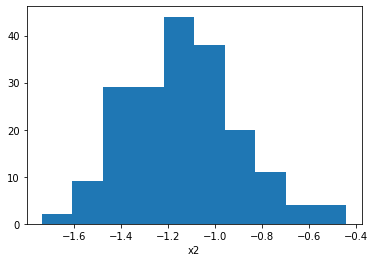

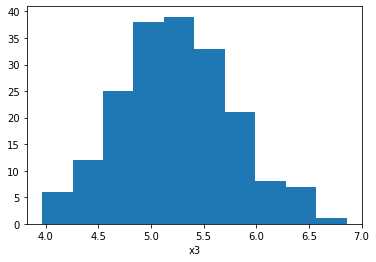

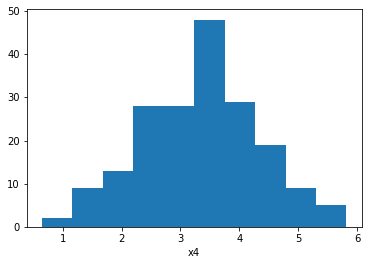

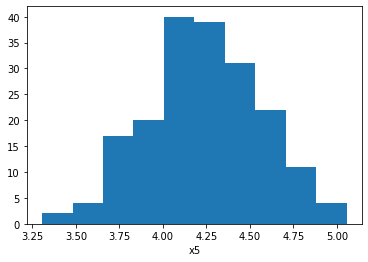

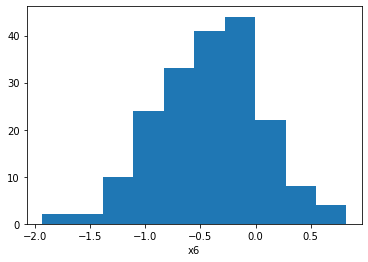

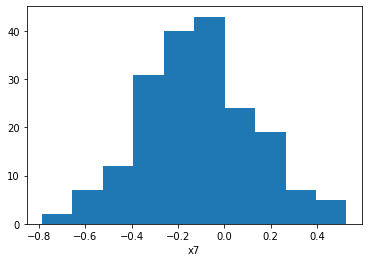

In [54]:
for col in datapca.columns.values :
  plt.hist(datapca[col])
  plt.xlabel(col)
  plt.show()

Looks like that data is centered

Now we will see correlation matrix

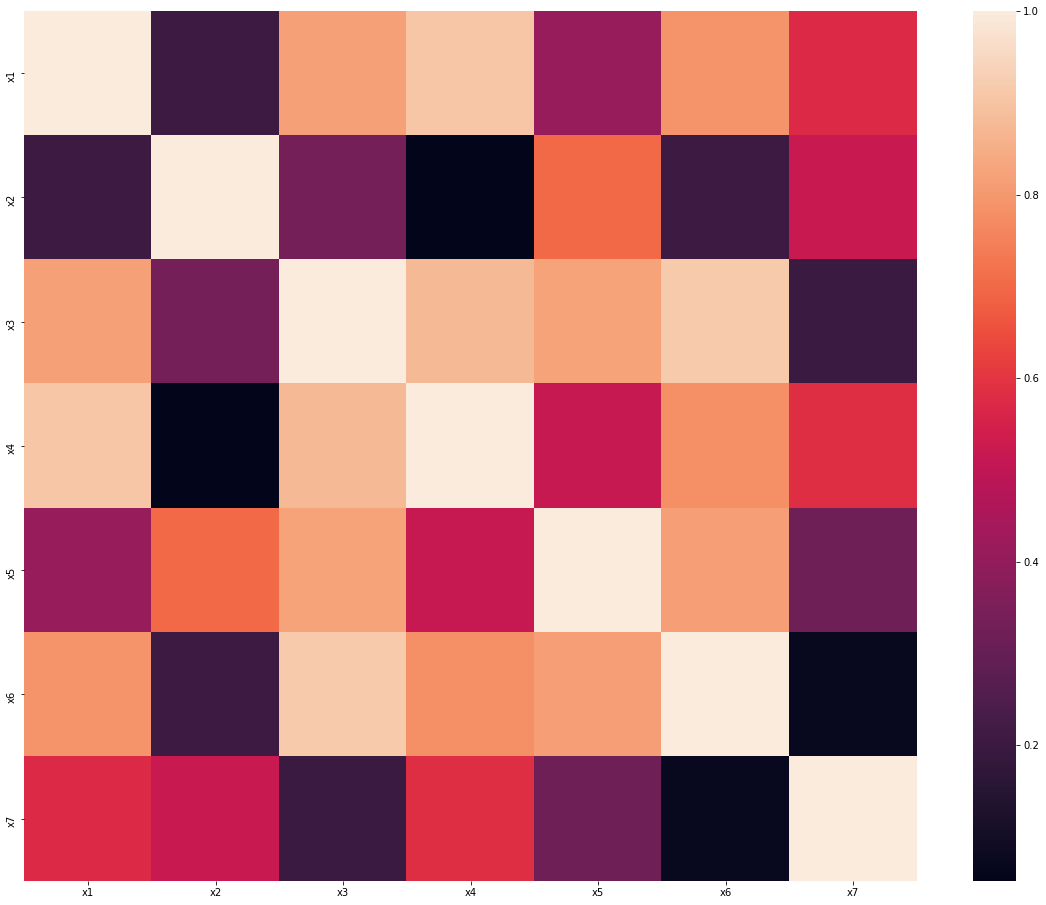

In [55]:
corrMatrix = datapca.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

Nothing is highly correlated 

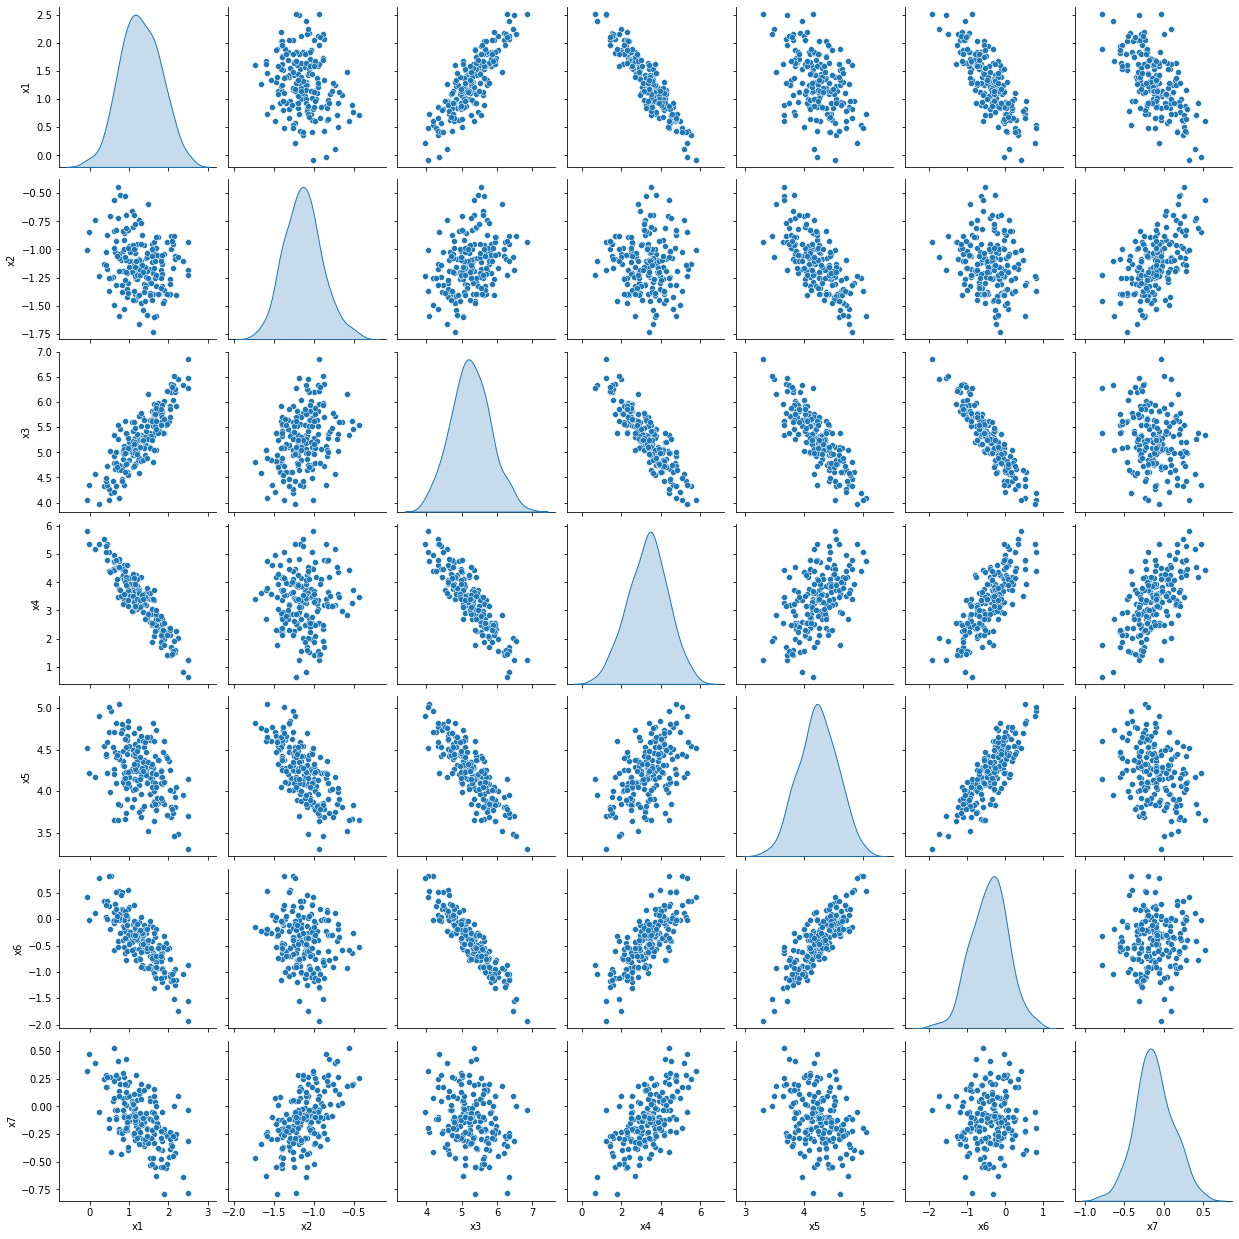

In [56]:
sns.pairplot(datapca, diag_kind='kde')

In [57]:
datapca.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


We need to normalize the features

In [58]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(datapca)
datapca = scaler.transform(datapca)


This will do mean 0 and std 1.

Part- B) Train PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
datapca1 = pca.fit_transform(datapca)
print(pca.explained_variance_ratio_)
print(pca.components_)

[6.09270567e-01 3.19460967e-01 6.49562011e-02 6.07238580e-03
 2.16027661e-04 1.98460843e-05 4.00494511e-06]
[[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]
 [-0.17626997  0.65002822  0.05259511 -0.28649785  0.06206424  0.44281272
  -0.51147813]
 [ 0.55915884  0.03818838  0.45641243  0.39746127  0.04595249  0.54178701
   0.15475942]
 [-0.11037788 -0.09304976 -0.01507989  0.59615727 -0.5428373  -0.09666457
  -0.56525322]
 [-0.5428688  -0.12514317  0.73396168  0.12268238  0.33143193 -0.15132589
  -0.05599364]
 [ 0.29104723  0.44812909 -0.12372342  0.38164805  0.52133099 -0.51257933
  -0.13778803]]


Next we will plot the total variance associated with the principal components instead of individual variance like we have seen in above result.

In [61]:
var_pc7 = pca.explained_variance_ratio_ ##stored in a variable to plot
comp_pc7= pca.components_
print(var_pc7)
print(comp_pc7)

[6.09270567e-01 3.19460967e-01 6.49562011e-02 6.07238580e-03
 2.16027661e-04 1.98460843e-05 4.00494511e-06]
[[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]
 [-0.17626997  0.65002822  0.05259511 -0.28649785  0.06206424  0.44281272
  -0.51147813]
 [ 0.55915884  0.03818838  0.45641243  0.39746127  0.04595249  0.54178701
   0.15475942]
 [-0.11037788 -0.09304976 -0.01507989  0.59615727 -0.5428373  -0.09666457
  -0.56525322]
 [-0.5428688  -0.12514317  0.73396168  0.12268238  0.33143193 -0.15132589
  -0.05599364]
 [ 0.29104723  0.44812909 -0.12372342  0.38164805  0.52133099 -0.51257933
  -0.13778803]]


In [62]:
## We will find the total variance associated with no. of principal components.
Principal_component = [1,2,3,4,5,6,7]

sum_var=0
total_var =[]
for i in range(len(var_pc7)):
  sum_var += var_pc7[i]
  total_var.append(sum_var)
print(total_var)

[0.6092705671697717, 0.9287315344464571, 0.9936877355145585, 0.9997601213098086, 0.9999761489705471, 0.999995995054893, 1.0]


Next we will plot the Individual variance of a component.

Part-C) Plotting the variance graphs.

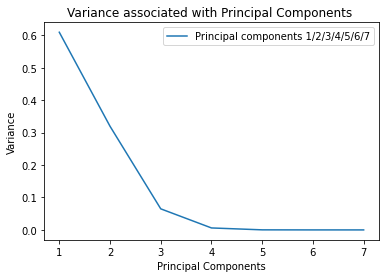

In [63]:
plt.plot(Principal_component,var_pc7, label="Principal components 1/2/3/4/5/6/7")
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.title('Variance associated with Principal Components ')
plt.legend()
plt.show()

We can see component 4-5-6 and 7 has a very less variance and most of the important feature component will be 1 and 2.

Now we will see the total variance plot.

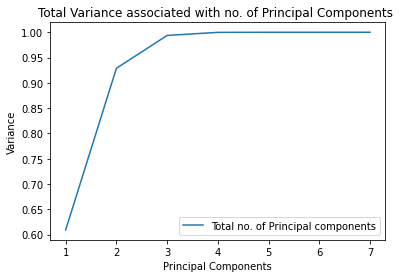

In [64]:
plt.plot(Principal_component,total_var, label="Total no. of Principal components")
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.title('Total Variance associated with no. of Principal Components ')
plt.legend()
plt.show()

So we can see that 3 principal components carries almost 99 percent of the variance. so we can reduce the dimensions to 3

Part-D) Go with various no. of dimesions and reconstruct the data.

Since we found from above analysis that 3 components are good so will go with 3 and since in the question it is asked to go with various no. of dimensions so we will iterate this for 4 and 2 principal components also.

In [67]:
def reconstruct_pca(n_components, datapca):
  """
  This function will reconstruct the data with given dimensions 
  Also prints the various parameters along with MSE.
  """

  pca = PCA(n_components) # For 3 principal components
  datapca_new = pca.fit_transform(datapca)
  print("The variance for these {} Principal component is :- ".format(n_components),pca.explained_variance_ratio_)
  print("-----------------------------------------------------------")
  print("The {} Principal components are : ".format(n_components),pca.components_)
  reconst_data = pca.inverse_transform(datapca_new)  ## This is reconstructed data
  print("-----------------------------------------------------------")
  print("Reconstructed data is :- ")
  print(reconst_data)
  MSE = metrics.mean_squared_error(datapca, reconst_data)
  print("-----------------------------------------------------------")
  print("Mean square Error is :- ", MSE)
  return print("----")

In [69]:
## Calling the above function for 3 Principal components.
reconstruct_pca(3, datapca)

The variance for these 3 Principal component is :-  [0.60927057 0.31946097 0.0649562 ]
-----------------------------------------------------------
The 3 Principal components are :  [[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]
 [-0.17626997  0.65002822  0.05259511 -0.28649785  0.06206424  0.44281272
  -0.51147813]]
-----------------------------------------------------------
Reconstructed data is :- 
[[-0.89148982  0.20122633 -0.71231476 ...  0.2433658   0.56622082
   0.81575488]
 [ 0.06094808 -0.15684325 -0.04248106 ...  0.15767568  0.0791172
  -0.21689138]
 [ 0.44687771 -0.16908039  0.50452451 ... -0.77881882 -1.04184163
   0.84288889]
 ...
 [ 0.80611585 -0.38783466  0.66672031 ... -0.56533969 -0.99837333
   0.1008804 ]
 [ 0.7457847  -0.80455087  0.35138567 ... -0.05211469 -0.63594144
  -0.27911538]
 [ 0.91186767 -0.91634652  0.43910177 ... -0.01609211 -0

Since 3 Principal components contains almost all the variance so mse is very less and this should also happen for the components greater than 3 

In [70]:
## Now for the 4 COmponents
reconstruct_pca(4, datapca)

The variance for these 4 Principal component is :-  [0.60927057 0.31946097 0.0649562  0.00607239]
-----------------------------------------------------------
The 4 Principal components are :  [[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]
 [-0.17626997  0.65002822  0.05259511 -0.28649785  0.06206424  0.44281272
  -0.51147813]
 [ 0.55915884  0.03818838  0.45641243  0.39746127  0.04595249  0.54178701
   0.15475942]]
-----------------------------------------------------------
Reconstructed data is :- 
[[-0.88682399  0.20154498 -0.70850629 ...  0.24374925  0.57074168
   0.81704625]
 [ 0.08042582 -0.155513   -0.02658239 ...  0.15927639  0.09798981
  -0.21150049]
 [ 0.50211582 -0.16530784  0.54961252 ... -0.77427927 -0.98831965
   0.85817724]
 ...
 [ 0.78122515 -0.3895346   0.64640332 ... -0.56738524 -1.02249073
   0.09399135]
 [ 0.80388571 -0.8005828   0.3988105

See for the 4 component MSE reduces .

In [71]:
## Now look for 2 Components.
reconstruct_pca(2,datapca)

The variance for these 2 Principal component is :-  [0.60927057 0.31946097]
-----------------------------------------------------------
The 2 Principal components are :  [[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]]
-----------------------------------------------------------
Reconstructed data is :- 
[[-0.92125485  0.3109904  -0.70343352 ...  0.253846    0.64099438
   0.72938644]
 [ 0.071352   -0.19520961 -0.04558536 ...  0.15401249  0.05298125
  -0.18670262]
 [ 0.25295688  0.54603863  0.56238625 ... -0.71053976 -0.5546877
   0.28019372]
 ...
 [ 0.67361357  0.10079207  0.7062561  ... -0.51868595 -0.66551065
  -0.28359812]
 [ 0.62852888 -0.3721483   0.38637225 ... -0.0108292  -0.34137983
  -0.61935362]
 [ 0.80186744 -0.51070025  0.47192344 ...  0.02263871 -0.41398547
  -0.81749341]]
-----------------------------------------------------------
Mean square Er

So Here we can conclude that if we reduce the component mse will increase and if we increase the component mse will decrease since variance associated with it varies.

**Answer - 3**



KPCA

Part- A) Visualization and Preprocessing

In [72]:
## Upload the KPCA file
from google.colab import files
files.upload()

Saving DataKPCA.csv to DataKPCA.csv


{'DataKPCA.csv': b'x1,x2,x3,x4,x5,x6,x7\r\n2.596640509,15.263178,-46.28960653,-10.99326466,-2.266729194,1.935832482,2.0396877\r\n3.096285506,14.78480151,-48.17561427,-8.799361564,-2.220870724,1.851200569,1.921973854\r\n3.360245562,14.77491748,-49.47184058,-9.030500626,-1.760446691,1.753113733,2.04193304\r\n2.214818739,15.02739352,-43.20039972,-13.56500093,-2.643018084,2.200462782,2.141846829\r\n3.398576033,15.11575618,-49.41664444,-6.857672386,-2.025936024,1.788084659,1.875540328\r\n4.080436486,15.75759151,-51.58411561,-4.041382051,-1.540465855,1.7581366,1.858052093\r\n2.612301887,12.77441721,-43.30257945,-11.69401423,-3.052707575,2.041606184,1.95515833\r\n2.724491203,14.08069952,-44.8974533,-10.30676511,-3.202603397,2.351700239,1.84075026\r\n3.077563575,15.16740014,-48.56275142,-8.72323472,-2.042683208,1.807550041,1.966046494\r\n2.863602038,14.5954978,-47.12790847,-9.040324966,-2.182095322,1.798212446,1.969454421\r\n4.787397551,14.74023161,-52.21699562,-3.570179873,-1.414848196,1.8260

In [75]:
datakpca = pd.read_csv('/content/DataKPCA.csv')
display(datakpca)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


So there are 7 columns

In [78]:
#getting the null count in training data
datakpca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


So all the entries are of float datatype and non Null.

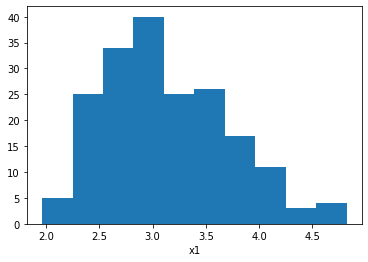

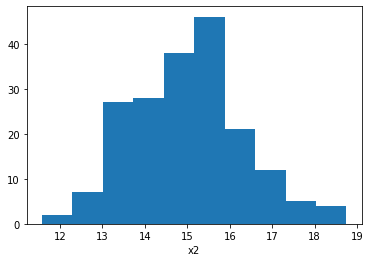

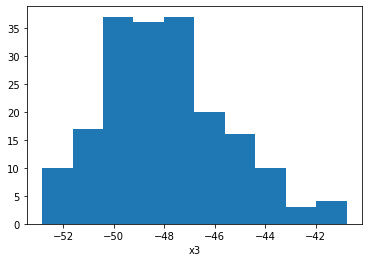

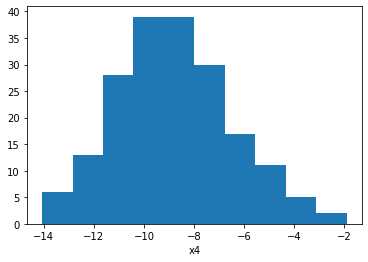

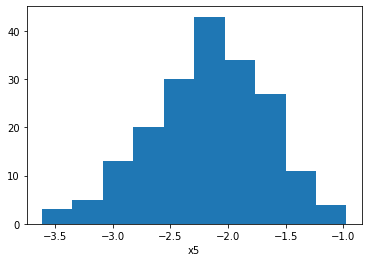

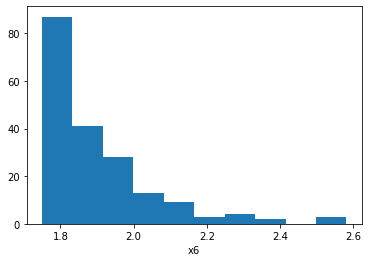

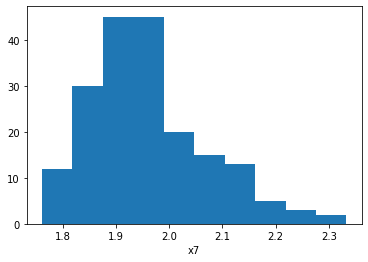

In [79]:
for col in datakpca.columns.values :
  plt.hist(datakpca[col])
  plt.xlabel(col)
  plt.show()

if we leave one or two feature all other are centered.

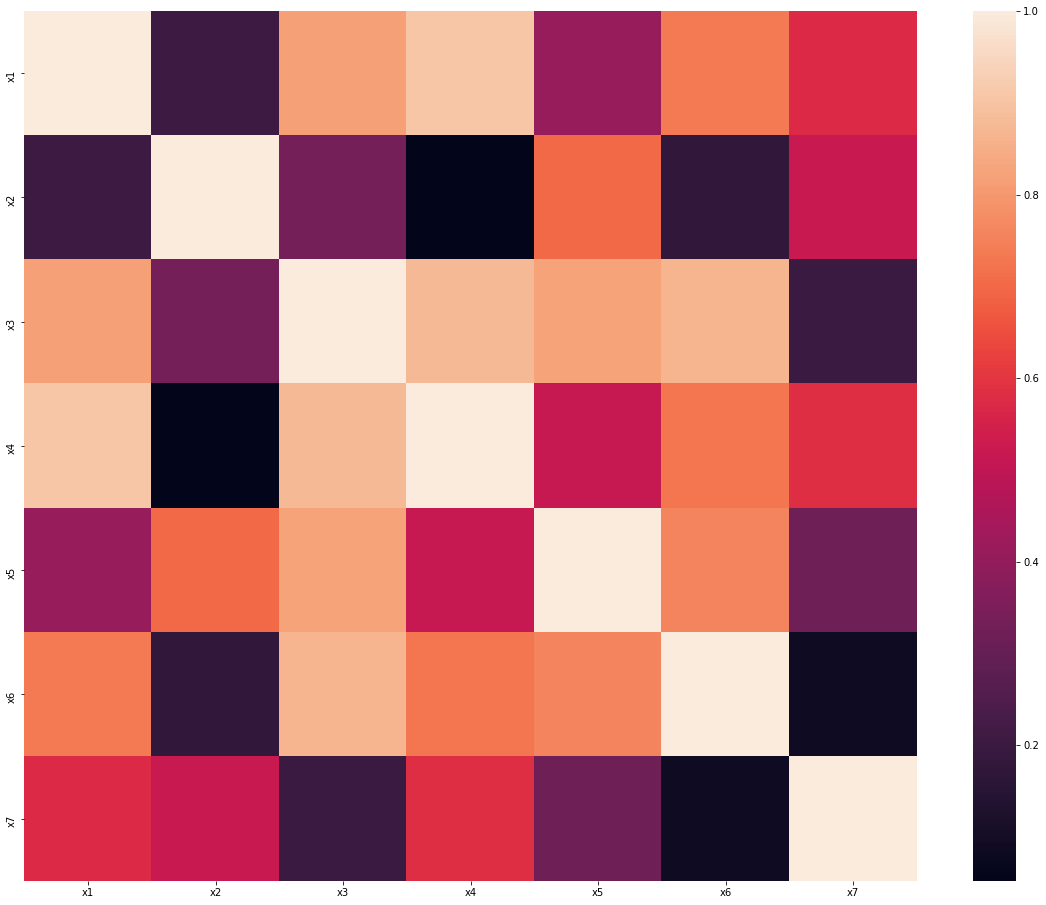

In [80]:
corrMatrix = datakpca.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot= False)
plt.show()

Correlation is not there.

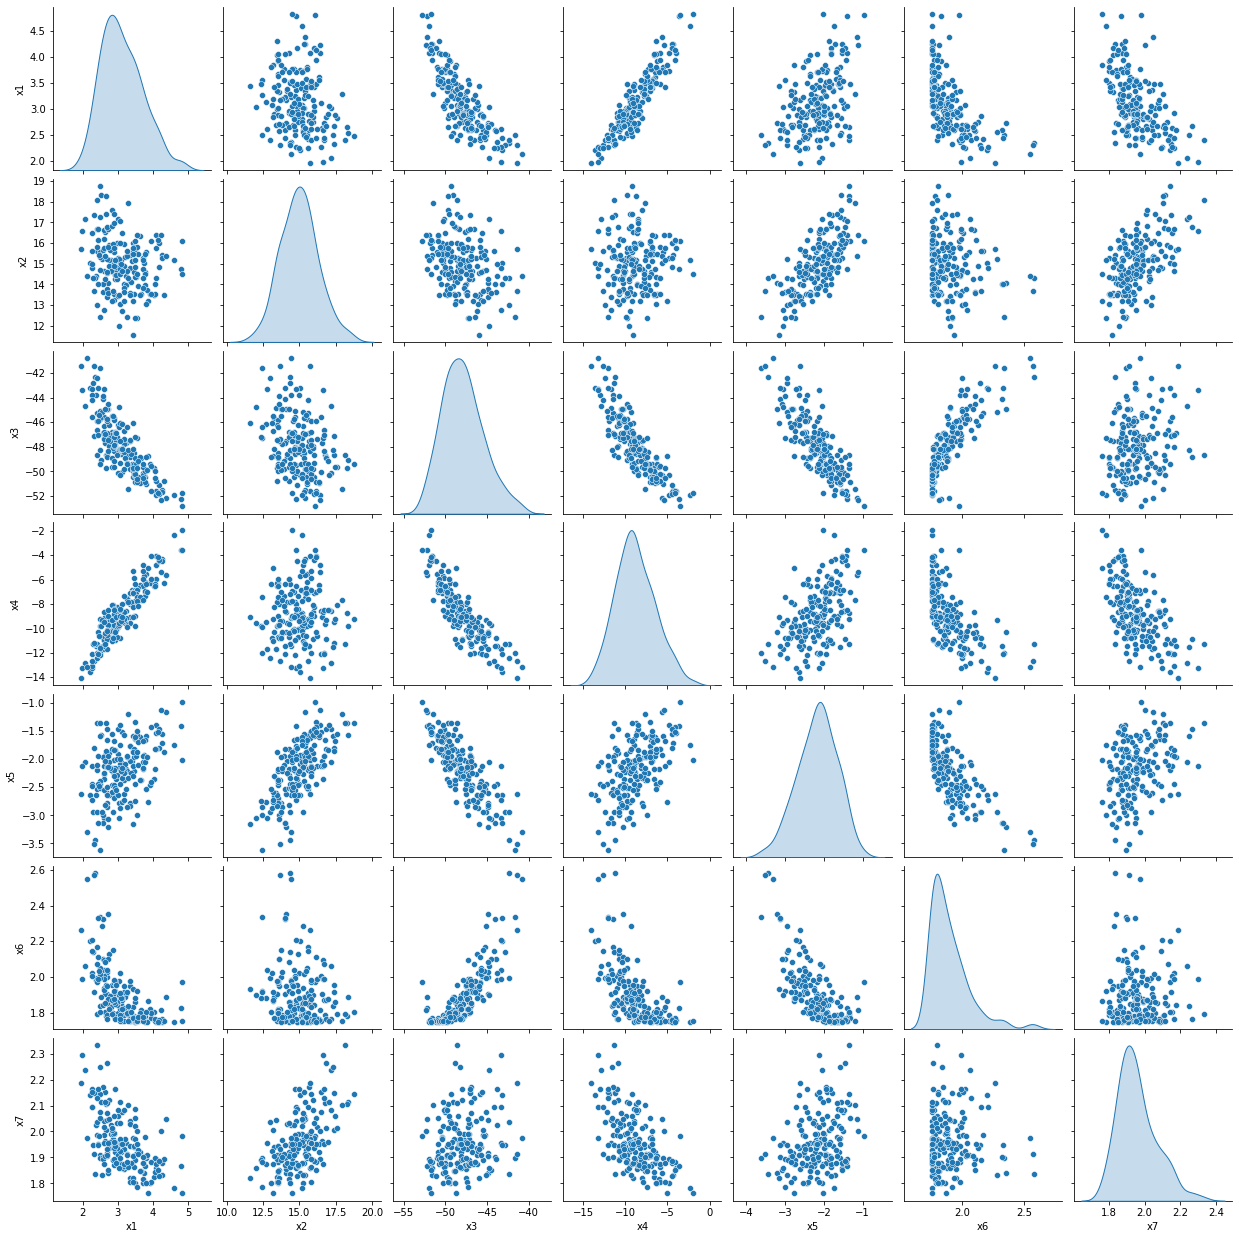

In [82]:
#Plotting the pariplot
sns.pairplot(datakpca, diag_kind='kde')

In [83]:
datakpca.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


We need to normalize the data before further training kpca

In [84]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(datakpca)
datapca = scaler.transform(datakpca)


Now mean is zero and std is 1.

Part - B ) Train KPCA

In [88]:
from sklearn.decomposition import KernelPCA

## In the question no. of components is upto 10
kpca = KernelPCA(n_components=10)
datakpca1 = kpca.fit_transform(datakpca)


So have a look at transformed data.

In [89]:
print(datakpca1)

[[ 2.6795252   0.73248795 -0.18605373 ... -0.          0.
  -0.        ]
 [-0.17377218 -0.10864177 -0.24289927 ...  0.         -0.
   0.        ]
 [-1.04066819  0.38426905 -1.24599355 ... -0.          0.
   0.        ]
 ...
 [-2.02721154 -0.35219188 -0.74891127 ...  0.          0.
   0.        ]
 [-1.29908939 -0.85873478 -0.89157371 ...  0.          0.
   0.        ]
 [-1.83824156 -1.12783385 -0.82944975 ...  0.          0.
   0.        ]]


Since there are 7 features and we have given component 10 so last 3 rows are zero.

Part- C) Find the variance associated.

In [92]:
variance =np.var(datakpca1, axis=0)
print(variance)

[1.11650071e+01 2.12474123e+00 4.31938414e-01 2.56807298e-02
 1.54871104e-02 1.64509868e-03 4.56134163e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


Next we will plot the variance.

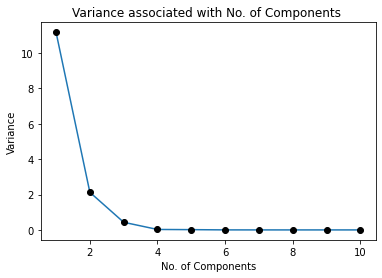

In [94]:
plt.plot(np.arange(1,11),variance)
plt.plot(np.arange(1,11),variance,'ko')
plt.xlabel('No. of Components')
plt.ylabel('Variance')
plt.title('Variance associated with No. of Components ')
plt.show()

So here also we can see the Most of the variance associated with 1, 2 and 3 and rest of the features can be eliminated.